In [130]:
# calc stats of the new COCO train 
# from collections import defaultdict
import json

lst = [ './COCO_data/train/_annotations.coco.json', './OpenImages/_new_COCO_train.json']

stat = []
for l in lst:
    with open(l, 'r') as f:
        COCO_train_json = json.load(f)

    stats = {}
    map_id_2_cat = {}
    for cat in COCO_train_json['categories']:
        stats[cat['name']] = 0
        map_id_2_cat[cat['id']] = cat['name'] 

    # stats = defaultdict(int) # to count the number of samples in each category
    for box in COCO_train_json['annotations']:
        stats[map_id_2_cat[box['category_id']]] += 1

    print(stats, '\n')
    stat.append(stats)


{'coco-objects': 0, 'airplane': 5011, 'apple': 5659, 'backpack': 8569, 'banana': 9064, 'baseball bat': 3225, 'baseball glove': 3684, 'bear': 1270, 'bed': 4132, 'bench': 9675, 'bicycle': 6923, 'bird': 10346, 'boat': 10379, 'book': 23695, 'bottle': 23728, 'bowl': 14105, 'broccoli': 7149, 'bus': 5959, 'cake': 6174, 'car': 42819, 'carrot': 7647, 'cat': 4691, 'cell phone': 6305, 'chair': 37518, 'clock': 6195, 'cow': 7959, 'cup': 20268, 'dining table': 15470, 'dog': 5406, 'donut': 6922, 'elephant': 5399, 'fire hydrant': 1848, 'fork': 5396, 'frisbee': 2634, 'giraffe': 5045, 'hair dryer': 196, 'handbag': 12149, 'horse': 6448, 'hot dog': 2826, 'keyboard': 2810, 'kite': 8642, 'knife': 7644, 'laptop': 4848, 'microwave': 1653, 'motorcycle': 8543, 'mouse': 2219, 'orange': 6176, 'oven': 3276, 'parking meter': 1271, 'person': 252966, 'pizza': 5739, 'potted plant': 8507, 'refrigerator': 2599, 'remote': 5615, 'sandwich': 4283, 'scissors': 1437, 'sheep': 9089, 'sink': 5529, 'skateboard': 5442, 'skis': 6

In [125]:
from matplotlib import pyplot as plt
import numpy as np

In [127]:
# for l in [0,1]:
#     fig = plt.figure(figsize=(12,5))
#     dd = np.array(list(stat[l].values())[1:])
#     idx = np.argsort(dd)[::-1]
#     plt.bar(np.arange(80), dd[idx])
#     labels = np.array(list(stats.keys())[1:])[idx]
#     plt.xticks(np.arange(80),labels, rotation='vertical')
#     # plt.xtickl
#     plt.show()

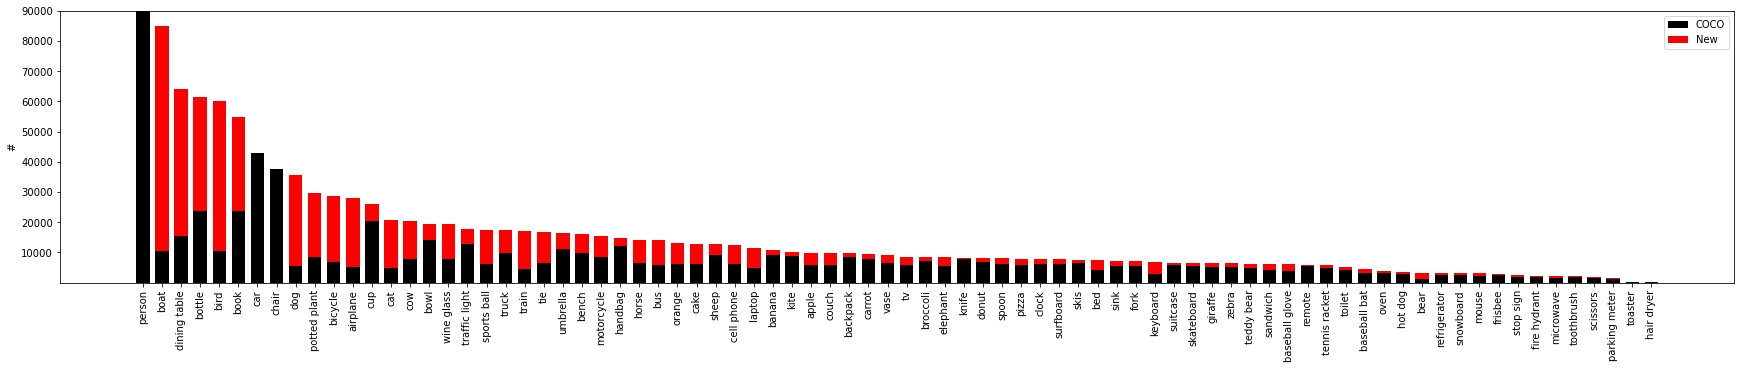

In [131]:
fig, ax = plt.subplots(figsize=[30, 5])                

coco, new = np.array(list(stat[0].values())[1:]), np.array(list(stat[1].values())[1:])
sort_indices = np.argsort(new)[::-1]

ax.bar(np.arange(len(coco)), coco[sort_indices], .7, color = 'black')    
ax.bar(np.arange(len(new)), new[sort_indices]-coco[sort_indices], .7, color = 'red', bottom=coco[sort_indices])        

labels = np.array(list(stat[1].keys())[1:])
plt.xticks(np.arange(len(coco)), labels[sort_indices], rotation = 90)    
# plt.legend(['Bounding Box (Top-1)', 'Bounding Box (Top-5)', 'Full Image (Top-1)', 'Full Image (Top-5)', 'Center Crop (Top-1)' , 'Center Crop (Top-5)'])
plt.ylabel('#')
# plt.title(m + txts[ti])
plt.ylim(1,90000)
plt.legend(['COCO', 'New'])

plt.show()


In [121]:
print(stat[0]['hair dryer'])

196


In [120]:
stat[1]['hair dryer']

220